Working on EDA of the Medical data which I downloaded

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('medical_data.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

Target is to get *amount* in charges column using a ML model, where the input will be the reaming columns _age, sex, bmi, children, smoker, region_

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Working on Data Visualizations

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Changing some setting -> depending on the usecase

sns.set_style('darkgrid')   
# matlotlib rcparms can be changed as per the requirement

#### Age

In [8]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

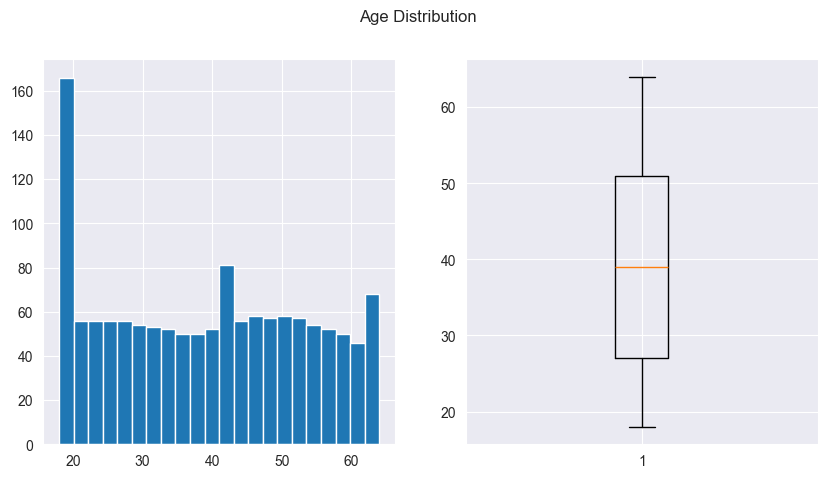

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.hist(data.age, bins = 22)
plt.subplot(1,2,2)
plt.boxplot(data.age)
plt.suptitle('Age Distribution')
plt.show()

Q: Why there are so many customers in the age group of 18-20

#### BMI

In [10]:
data.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

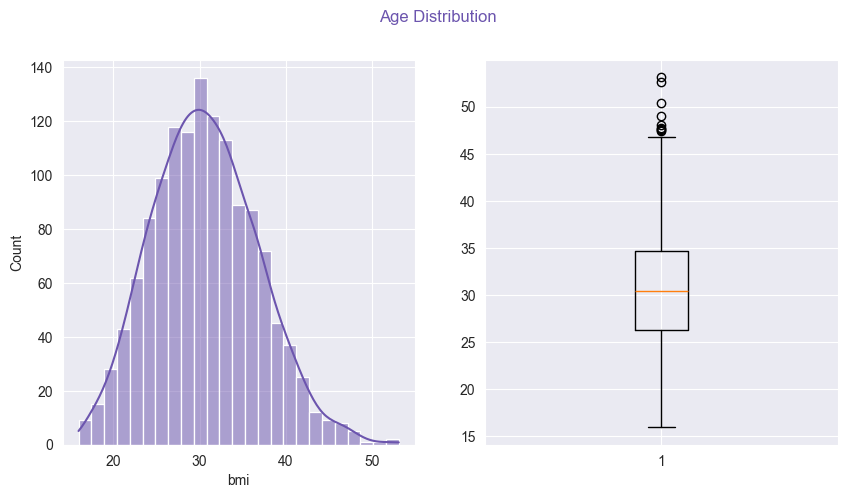

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.histplot(data.bmi, bins = 25, color='#6C55AE', kde=True)
plt.subplot(1,2,2)
plt.boxplot(data.bmi)
plt.suptitle('Age Distribution', c='#6C55AE')
plt.show()

#### Charges

In [12]:
data.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Axes: xlabel='charges'>

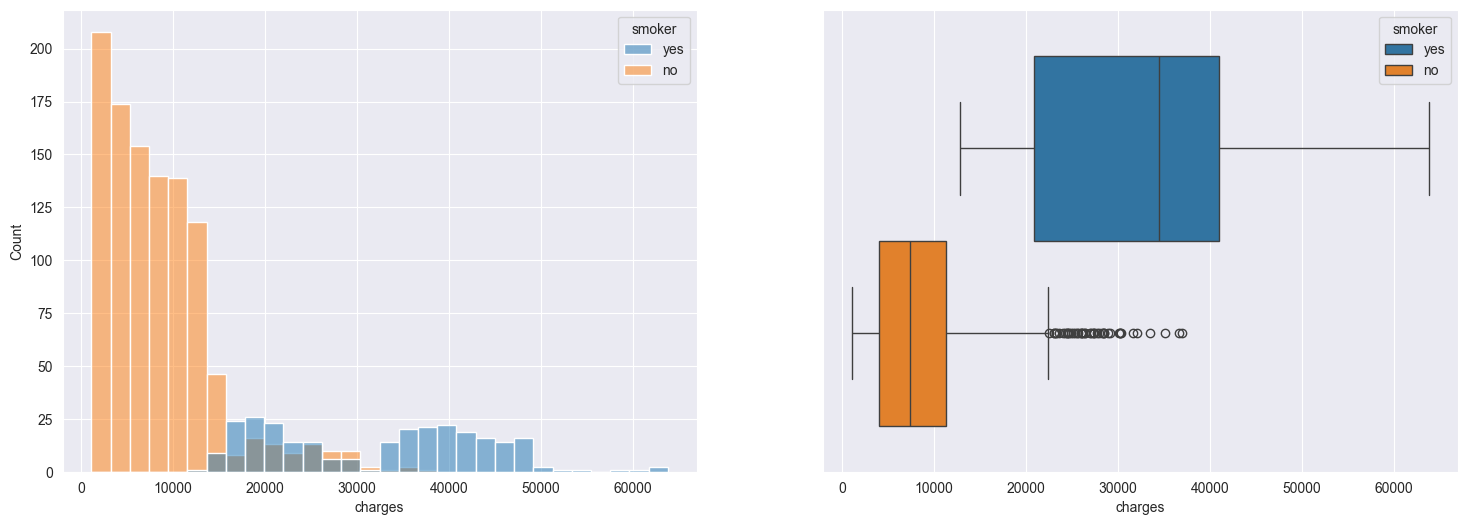

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(data = data, hue= 'smoker', x = 'charges')
plt.subplot(1,2,2)
sns.boxplot(data =data, x='charges', hue='smoker')

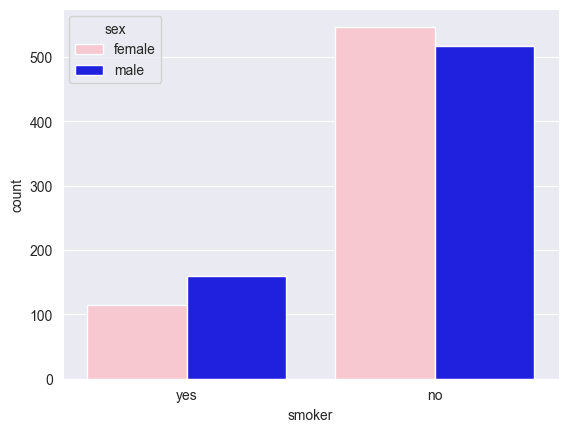

In [14]:
ax = sns.countplot(data= data, x='smoker', hue='sex', palette={'male':"blue", "female":"pink"})

# Below code can be used to annotate the graphs
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')


#### Distribution of the region

In [15]:
data.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

<Axes: xlabel='region', ylabel='count'>

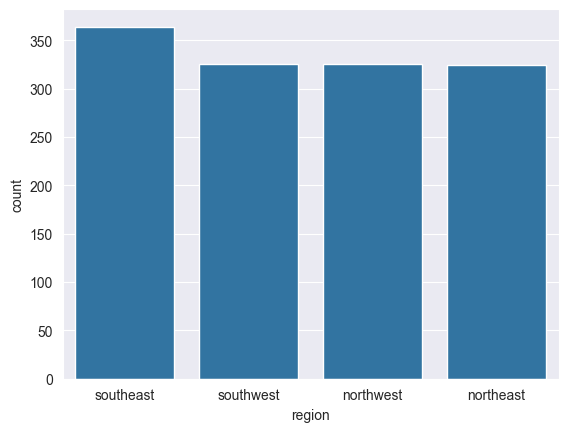

In [16]:
sns.barplot(data.region.value_counts())

#### Relation between Age and Charges

I think there can be huge co-relation between age and the premium ammount. Need to verify that

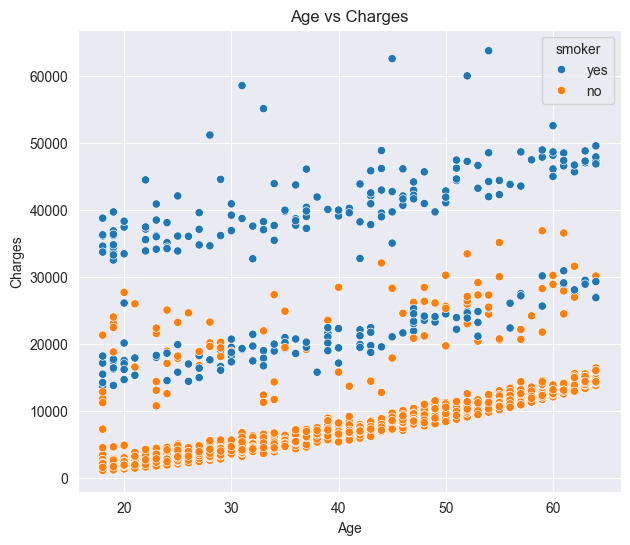

In [17]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=data, x='age', y='charges', hue='smoker')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges")
plt.show()

1. There is a general trend that the charges increased with increase in Age
1. Smokers need to pay more money than that of non-smokers
1. Can spot 3 clusters of people which follow the trend of stright line.
1. **Hypothesis 2nd Cluster :** The common overlapping points may be due  to the pre-exesting illness or health condition

#### BMI and Charges 

What is the relation between the BMI of an indivuidial and the Insurance Premium Charges

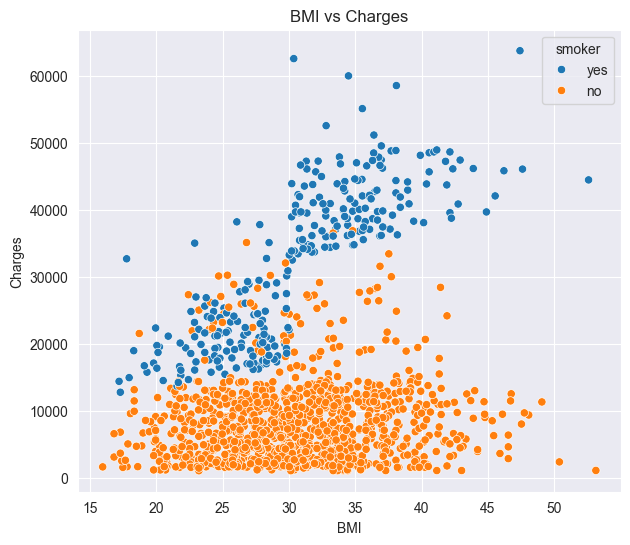

In [18]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.show()

1. A trend can be seen for Smokers in BMI vs Charges
1. There is no clear trend for non-smokers

#### Charges vs Number of children

<Axes: xlabel='children', ylabel='charges'>

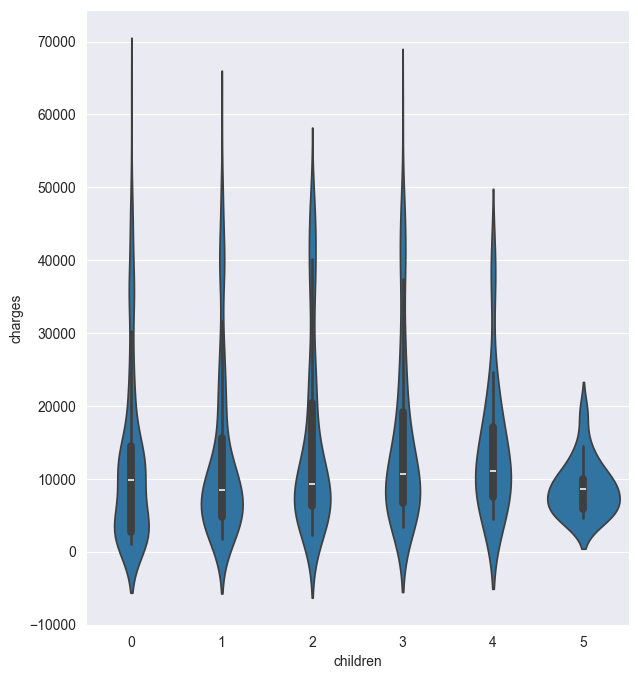

In [19]:
plt.figure(figsize=(7,8))
sns.violinplot(data, x='children', y = 'charges')

### Finding co-relation between the feilds

co-relation between 2 matrics are measured through co-relation matrix `.corr`

In [20]:
# finding the relation of the charges only
data.charges.corr(data.age)

0.2990081933306476

In [21]:
smoker_val = {'yes':1, 'no':0}
data['smoker_numeric'] = data.smoker.map(smoker_val)

In [22]:
data.drop(columns = ['smoker'], inplace=True)

In [23]:
data.drop(columns=['region', 'sex']).corr() 

,age,bmi,children,charges,smoker_numeric
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker_numeric,-0.025019,0.003750,0.007673,0.787251,1.000000


## Linear Regression using Single feature

Making a linear regressor model by just using age. Although Smoker has the highest co-relation with charges but we can't make it as this has only YES-NO value

So initially we are going to make the model only for the non-smokers

In [24]:
non_smokers = data[data.smoker_numeric == 0]
non_smokers.shape

(1064, 7)

<Axes: title={'center': 'Age vs Charges for non smokers'}, xlabel='age', ylabel='charges'>

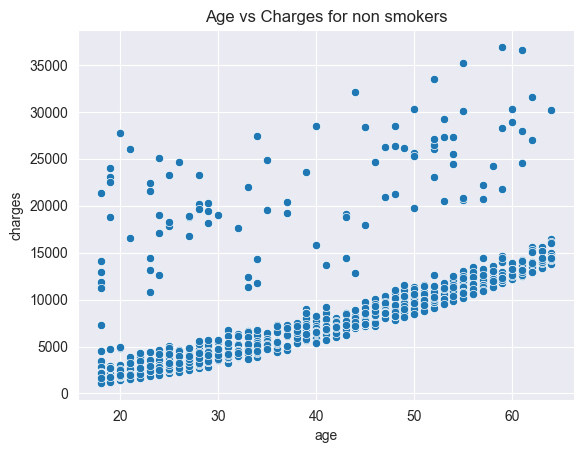

In [25]:
# Age vs charges for non-smokers
plt.title("Age vs Charges for non smokers")
sns.scatterplot(non_smokers, x= 'age', y='charges')

We can create some functions whwere we can try different params and try to fit the line as per the requiremet

### Using Sk learn to find the best fit line 

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [29]:
x = non_smokers[['age']]
y = non_smokers['charges']
print(x.shape, y.shape)

(1064, 1) (1064,)


In [30]:
model.fit(x,y)

LinearRegression()

In [31]:
# Predecting some randon value -> not imp
model.predict([[17], [20], [28], [50]])

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 2451.81096157,  3253.55770006,  5391.54900271, 11271.02508499])

Getting the result for the train dataset

In [32]:
pre = model.predict(x)
pre

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [33]:
y

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [34]:
import numpy as np
def rmse (tar, pre):
    return np.sqrt(np.mean(np.square(tar-pre)))

In [35]:
rmse(pre, y)

4662.505766636395

In [36]:
model.coef_

array([267.24891283])

In [37]:
model.intercept_

-2091.4205565650864

Using SGD regressor for predecting

In [38]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()

In [39]:
model.fit(x, y)

SGDRegressor()

In [40]:
pre = model.predict(x)
pre

array([ 714.79276692, 3572.70650136, 5001.66336857, ...,  714.79276692,
        714.79276692, 1572.16688725])

In [41]:
y

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [42]:
rmse(pre, y)

4938.814367185107

In [43]:
model.coef_

array([285.79137344])

In [44]:
model.intercept_

array([-4429.45195507])

## Linear Regression using multiple features

Taking multiple features in account to predict the premium price 

#### Using **Age** and **BMI** to predict the same

In [45]:
x = non_smokers[['age', 'bmi']]
y = non_smokers['charges']

print(x.shape, y.shape)

(1064, 2) (1064,)


In [46]:
model = LinearRegression().fit(x, y)

In [47]:
pre = model.predict(x)
pre

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

In [48]:
y

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [49]:
rmse(pre, y)

4662.3128354612945

In [50]:
model.coef_ , model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

There is no increase in the accuracy of the Model by adding the to the model as this has weak co-relation

#### Using Age,  BMI and **Children** to predict the same

In [51]:
x = non_smokers[['age', 'bmi', 'children']]
y = non_smokers['charges']

x.shape, y.shape

((1064, 3), (1064,))

In [52]:
model = LinearRegression().fit(x,y)

In [53]:
pre = model.predict(x)
pre

array([2724.94209163, 6535.13457204, 6065.27173951, ..., 2134.51524931,
       2160.54349555, 2898.08585583])

In [54]:
y

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [55]:
rmse(pre, y)

4608.470405038247

#### Now Taking the whole dataset 

In [56]:
x, y = data[['bmi', 'children', 'age']], data['charges']
model = LinearRegression().fit(x, y)

In [57]:
pre = model.predict(x)
rmse(pre, y)

11355.317901125973

This makes the model use less as the error is higher than the value of the expected result

## Using categorical columns 

### Working on Smoker feature

<Axes: xlabel='smoker_numeric', ylabel='charges'>

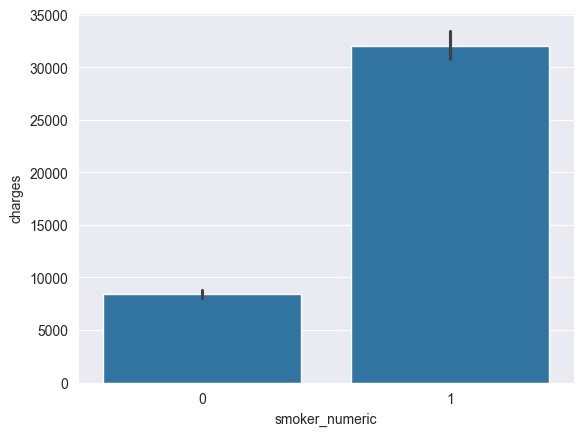

In [58]:
sns.barplot(data= data, x= 'smoker_numeric', y='charges')

In [59]:
data.charges.corr(data.smoker_numeric)

0.7872514304984782

In [60]:
x = data[['age', 'bmi', 'smoker_numeric', 'children']]
y = data.charges

x.shape, y.shape

((1338, 4), (1338,))

In [61]:
model = LinearRegression().fit(x, y)

In [62]:
pre = model.predict(x)
rmse(pre, y)

6056.439217188081

### working on sex data

<Axes: xlabel='sex', ylabel='charges'>

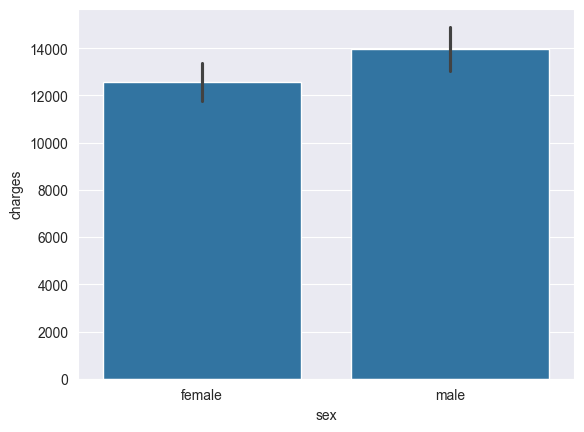

In [63]:
sns.barplot(data, x='sex', y= 'charges')

In [64]:
data.sex = data.sex.map({'male':1, 'female':0})
data.sample(5)

,age,sex,bmi,children,region,charges,smoker_numeric
909,32,0,24.600,0,southwest,17496.30600,1
897,19,1,25.555,1,northwest,2221.56445,0
458,56,1,39.600,0,southwest,10601.41200,0
275,47,0,26.600,2,northeast,9715.84100,0
1059,32,1,33.820,1,northwest,4462.72180,0


In [65]:
data.sex.corr(data.charges)

0.05729206220202532

In [66]:
x= data[['age', 'bmi', 'smoker_numeric', 'sex', 'children']]
x.shape, y.shape

((1338, 5), (1338,))

In [67]:
model = LinearRegression().fit(x, y)

In [68]:
pre = model.predict(x)
rmse(pre, y)

6056.100708754546

Working on sex columns is not required as there is no change in the accuracy of the model

#### One Hot Coding

<Axes: xlabel='region', ylabel='charges'>

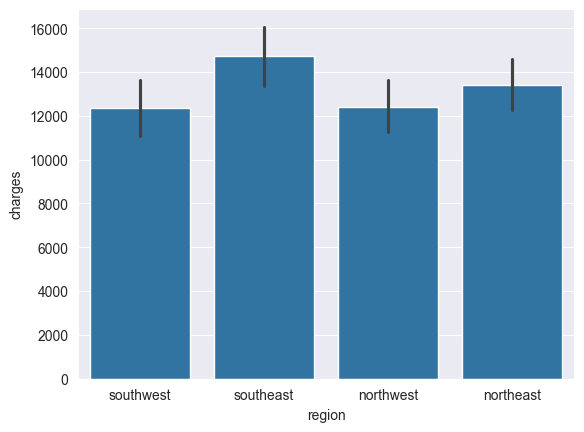

In [69]:
sns.barplot(data=data, x='region', y='charges')

In [70]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(data[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [71]:
one_hot = enc.transform(data[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [72]:
data[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
data.head()

,age,sex,bmi,children,region,charges,smoker_numeric,northeast,northwest,southeast,southwest
0,19,0,27.900,0,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,northwest,3866.85520,0,0.0,1.0,0.0,0.0


#### Including Region in the model

In [73]:
# finding co relation 
data.drop('region', axis=1).corr()

,age,sex,bmi,children,charges,smoker_numeric,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,0.299008,-0.025019,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.057292,0.076185,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.198341,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.067998,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.057292,0.198341,0.067998,1.000000,0.787251,0.006349,-0.039905,0.073982,-0.043210
smoker_numeric,-0.025019,0.076185,0.003750,0.007673,0.787251,1.000000,0.002811,-0.036945,0.068498,-0.036945
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.006349,0.002811,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.039905,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.073982,0.068498,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.043210,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


we can see there is not much of co-reation of between the charges and region

In [74]:
x,y = data.drop(['region', 'charges'], axis = 1), data.charges
x.shape, y.shape

((1338, 9), (1338,))

In [75]:
model = LinearRegression().fit(x,y)

In [76]:
pre = model.predict(x)
pre, y

(array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
         4149.13248568,  1246.58493898, 37085.62326757]),
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [77]:
rmse(pre, y)

6041.6796511744515

In [78]:
model.coef_, model.intercept_

(array([  256.85635254,  -131.3143594 ,   339.19345361,   475.50054515,
        23848.53454191,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 -12525.547811195444)

No relation is there can be verified from the cost function **RMSE**

## Seprate models for smokers and Non_smokers

In [79]:
non_smokers = data[data.smoker_numeric == 0].drop(['smoker_numeric', 'region'], axis=1)
smokers = data[data.smoker_numeric == 1].drop(['smoker_numeric', 'region'], axis=1)

### For Smokers data

In [80]:
smokers.head()

,age,sex,bmi,children,charges,northeast,northwest,southeast,southwest
0,19,0,27.90,0,16884.9240,0.0,0.0,0.0,1.0
11,62,0,26.29,0,27808.7251,0.0,0.0,1.0,0.0
14,27,1,42.13,0,39611.7577,0.0,0.0,1.0,0.0
19,30,1,35.30,0,36837.4670,0.0,0.0,0.0,1.0
23,34,0,31.92,1,37701.8768,1.0,0.0,0.0,0.0


#### using all the columns for the model training

In [81]:
x, y = smokers.drop(columns = 'charges'), smokers.charges

model = LinearRegression().fit(x,y)
pre = model.predict(x)
rmse(y, pre)

5668.4678821121515

The Error is less than that of the smokers and non-smokers when used togather

In [82]:
x, y = smokers[['age', 'bmi', 'children', 'sex']], smokers.charges

model = LinearRegression().fit(x,y)
pre = model.predict(x)
rmse(y, pre)

5715.398998862516

### For non- smokers

In [83]:
non_smokers.head()

,age,sex,bmi,children,charges,northeast,northwest,southeast,southwest
1,18,1,33.770,1,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,3866.85520,0.0,1.0,0.0,0.0
5,31,0,25.740,0,3756.62160,0.0,0.0,1.0,0.0


#### using all the columns for the model training

In [84]:
x, y = non_smokers[['age', 'bmi', 'children', 'sex']], non_smokers.charges

model = LinearRegression().fit(x,y)
pre = model.predict(x)
rmse(y, pre)

4601.343101319802

In [85]:
x, y = non_smokers.drop(columns= 'charges'), non_smokers.charges

model = LinearRegression().fit(x, y)
pre = model.predict(x)
rmse(pre, y)

4573.074988795492

This model works better for smokers and non-smokers

## Model improvement

### Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
x,y = data.drop(['region', 'charges'], axis = 1), data.charges
model = LinearRegression().fit(x,y)
rmse(model.predict(x), y)

6041.6796511744515

In [88]:
weights = pd.DataFrame({
    "feature": x.columns,
    "weights": model.coef_
})
weights

,feature,weights
0,age,256.856353
1,sex,-131.314359
2,bmi,339.193454
3,children,475.500545
4,smoker_numeric,23848.534542
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756


In [89]:
x.head()

,age,sex,bmi,children,smoker_numeric,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0


In [90]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(data[numeric_cols])

StandardScaler()

In [91]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [92]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [93]:
scaled_inputs = scaler.transform(data[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [94]:
cat_data = data[['sex', 'smoker_numeric', 'northeast', 'northwest', 'southeast', 'southwest']].values
cat_data

array([[0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.]])

In [95]:
x = np.concatenate((scaled_inputs, cat_data), axis = 1 )
y = data.charges
x.shape, y.shape

((1338, 9), (1338,))

In [96]:
x[0]

array([-1.43876426, -0.45332   , -0.90861367,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [97]:
model = LinearRegression().fit(x, y)
pre  = model.predict(x)
rmse(y, pre)

6041.679651174452

In [98]:
weights = pd.DataFrame({
    "feature": ['age', 'bmi', 'children', 'sex', 'smoker_numeric', 'northeast', 'northwest', 'southeast', 'southwest'],
    "weights": model.coef_
})
weights

,feature,weights
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,sex,-131.314359
4,smoker_numeric,23848.534542
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756


Training testing of the model can be implemetned for more learnigns